<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Дарья! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='purple'><b>Комментарий студента: </b></font>
<font color='blue'> Павел, привет! Приятно познакомиться! По формату нашего взаимодействия всё понятно, благодарю </font>


<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font> 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import re

import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, сгрупированы по функциональности. Можно ещё разделить группы пустой строкой.</font>

In [2]:
toxic_comments = pd.read_csv('/datasets/toxic_comments.csv')
toxic_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [3]:
toxic_comments.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

In [4]:
# проверим сколько токсичных и нектоксичных комментанриев, посчитаем соотношение
display(toxic_comments['toxic'].value_counts())
class_ratio = toxic_comments['toxic'].value_counts()[0] / toxic_comments['toxic'].value_counts()[1]
class_ratio

0    143106
1     16186
Name: toxic, dtype: int64

8.841344371679229

Классы не сбалансированы, поэтому будем применять разные способы балансировки и сравнивать их

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Мы обнаружили серьёзный дисбаланс при исследовании данных. Как дополнительные материалы, рекомендую статью <a href='https://dyakonov.org/2021/05/27/imbalance/'>Дисбаланс классов</a>, очень классная, как и весь блог Дьяконова. Ещё такой <a href='https://github.com/Dyakonov/ml_hacks/blob/master/book_disbalance_public_v1.ipynb'>ноутбук</a> есть.</font>

<font color='purple'><b>Комментарий студента: </b></font>
<font color='blue'> Здорово! Спасибо за рекомендацию, буду изучать! </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

In [5]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):

    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  

def lemmatize_text(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)  
    lemm_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tag(words)]
    return " ".join(lemm_words)

toxic_comments['lemm_text'] = toxic_comments['text'].apply(lemmatize_text)

toxic_comments = toxic_comments.drop(['text'], axis=1)


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Очистка сделана верно! Мы оставили только символы Латинского алфавита и привели к нижнему регистру!</font>

In [6]:
toxic_comments.head()

,Unnamed: 0,toxic,lemm_text
0,0,0,explanation why the edits make under my userna...
1,1,0,d aww he match this background colour i m seem...
2,2,0,hey man i m really not try to edit war it s ju...
3,3,0,more i can t make any real suggestion on impro...
4,4,0,you sir be my hero any chance you remember wha...


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s>Обрати внимание, не все слова приведены к начальным формам. Чтобы корректно обработались все части речи, для WordNetLemmatizer() нужно использовать POS-теги (Part of Speech, части речи). Примеры работы с WordNetLemmatizer(), а также с другими инструментами для лемматизации, можно найти в [этой статье](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/)</s></font>

<font color='purple'><b>Комментарий студента: </b></font>
<font color='blue'> Ага, поняла, исправляю. </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отлично! Теперь видно, что слова в начальных формах.</font>

Разделим выборку в соотношении 50/20/20. Выберем количество кроссвалидаций до 3.

In [7]:

target = toxic_comments['toxic']
features = toxic_comments.drop(['toxic'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.5, 
                                                                              random_state=1515)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            test_size=0.5,
                                                                            random_state=1515)

nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords)

features_train_tfidf = count_tf_idf.fit_transform(features_train['lemm_text'].values)
features_valid_tfidf = count_tf_idf.transform(features_valid['lemm_text'].values)
features_test_tfidf = count_tf_idf.transform(features_test['lemm_text'].values)

classificator = LogisticRegression()

# создаем Pipeline, объединяя векторизатор и модель
pipeline = Pipeline([
    ('model', classificator)  
])

# обучаем Pipeline на обучающей выборке
pipeline.fit(features_train_tfidf, target_train)
predictions = pipeline.predict(features_valid_tfidf)

f1 = f1_score(target_valid, predictions)
print(f"F1-score: {f1}")


print(features_train_tfidf.shape)
print(features_valid_tfidf.shape)
print(features_test_tfidf.shape)

cv_counts = 2


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


F1-score: 0.7054169202678028
(79646, 114926)
(39823, 114926)
(39823, 114926)


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что у нас есть три выборки!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Классно, что векторизатор был обучен только на тренировочной части данных!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Можно объединить Векторизатор с моделью через Pipeline. Так можно избежать утечек даже при кроссвалидации моделей.<br> Материалы по Pipeline:<br> [О Пайплайн](https://www.helenkapatsa.ru/paiplain/)<br>

[Примеры работы с текстами](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_text_feature_extraction.html)</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Метод .astype('U') кодирует текст в максимально широкий Юникод U32, содержащий все возможные символы и эмоджи. Такое форматирование здесь не имеет смысла, так как после очистки останется только латинница (тексты, в основном, и так уже в Юникоде "utf-8"). Ни одна из используемых в проекте моделей не требует кодировки в Юникод. Можно обойтись и без него.</s></font>

<font color='purple'><b>Комментарий студента: </b></font>
<font color='blue'> поняла, спасибо! </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

In [8]:
# создаем модель
classificator = LogisticRegression()

# вычисляем F1 на кросс-валидации
train_f1 = cross_val_score(classificator, 
                           features_train_tfidf,  # Используем features_train_tfidf
                           target_train, 
                           cv=cv_counts, 
                           scoring='f1').mean()

print('F1 на CV =', train_f1)

F1 на CV = 0.6402255916528405


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово что оценка кроссвалидацией.</font>

Проводим балансировку классов (уменьшаем размер весов классов)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [9]:
classificator = LogisticRegression(class_weight='balanced')

pipeline = Pipeline([
    ('model', classificator)  
])


pipeline.fit(features_train_tfidf, target_train)
predictions = pipeline.predict(features_valid_tfidf)

f1 = f1_score(target_valid, predictions)
print(f"F1-score: {f1}")

train_f1_balanced = cross_val_score(classificator, 
                           features_train_tfidf,  
                           target_train, 
                           cv=cv_counts, 
                           scoring='f1').mean()

print('F1 на CV с балансированными классами =', train_f1_balanced)


F1-score: 0.7327502429543246
F1 на CV с балансированными классами = 0.7329483321262973


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проведём ресемплинг с уменьшением класса 0

In [10]:
toxic_comments_train = toxic_comments.iloc[target_train.index]

target_train_class_zero = toxic_comments_train[toxic_comments_train['toxic'] == 0]['toxic']
target_train_class_one = toxic_comments_train[toxic_comments_train['toxic'] == 1]['toxic']


In [11]:
target_train_class_zero_downsample = target_train_class_zero.sample(target_train_class_one.shape[0],
                                                                    random_state=1234)
target_train_downsample = pd.concat([target_train_class_zero_downsample, target_train_class_one])

features_train_downsample = toxic_comments.iloc[target_train_downsample.index]
features_train_downsample, target_train_downsample = shuffle(features_train_downsample,
                                                             target_train_downsample,
                                                             random_state=1234)
features_train_downsample = count_tf_idf.transform(features_train_downsample['lemm_text']
                                                   .values)


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что балансируются только обучающие данные.</font>

In [12]:
classificator = LogisticRegression()
cv_counts = 3

stratified_kfold = StratifiedKFold(n_splits=cv_counts, shuffle=True, random_state=42)

train_f1_downsampled = cross_val_score(classificator,
                                       features_train_downsample, 
                                       target_train_downsample, 
                                       cv=stratified_kfold, 
                                       scoring='f1').mean()

print('F1 на CV с уменьшением классов', train_f1_downsampled)

F1 на CV с уменьшением классов 0.8774694059281241


In [13]:
cv_counts = 3
stratified_kfold = StratifiedKFold(n_splits=cv_counts, shuffle=True, random_state=42)

f1_scores = []

for train_index, val_index in stratified_kfold.split(features_train, target_train):
    train_features, val_features = features_train_tfidf[train_index], features_train_tfidf[val_index]
    train_target, val_target = target_train.iloc[train_index], target_train.iloc[val_index]

    classificator = LogisticRegression()  
    classificator.fit(train_features, train_target)
    
    predictions = classificator.predict(val_features)
    f1 = f1_score(val_target, predictions)
    f1_scores.append(f1)

mean_f1 = sum(f1_scores) / len(f1_scores)
print('Средний F1 на CV с несбалансированными данными =', mean_f1)


Средний F1 на CV с несбалансированными данными = 0.6690649043258073


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Кроссвалидация на сбалансированных данных даёт не корректную оценку. Лучше проверять на несбалансированной валидационной выборке.</font>

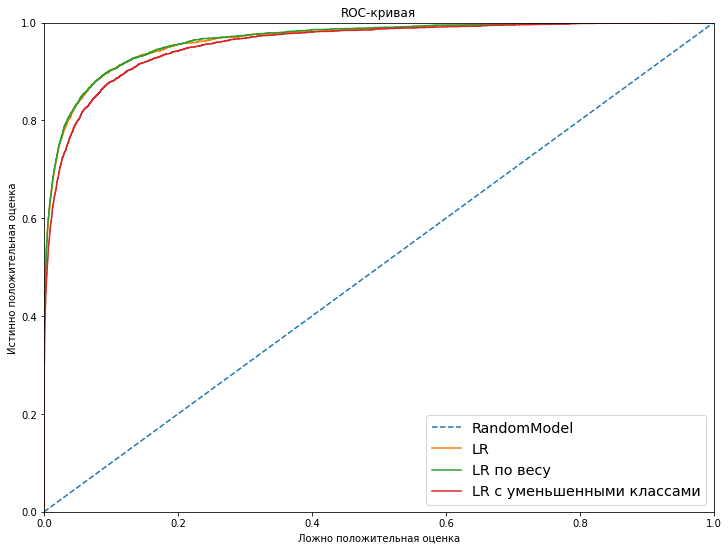

In [14]:
dict_classes = {0: 1, 1: 5}         

# Строим ROC-AUC графики балансировки
plt.figure(figsize=[12,9])
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

# Обучаем и оцениваем модель без балансировки
classificator = LogisticRegression()
classificator.fit(features_train_tfidf, target_train)
probabilities_valid = classificator.predict_proba(features_valid_tfidf)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1 = f1_score(target_valid, classificator.predict(features_valid_tfidf))
plt.plot(fpr, tpr, label='LR')

# Обучаем и оцениваем модель с балансировкой
classificator = LogisticRegression(class_weight=dict_classes)
classificator.fit(features_train_tfidf, target_train)
probabilities_valid = classificator.predict_proba(features_valid_tfidf)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_balanced = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1_balanced = f1_score(target_valid, classificator.predict(features_valid_tfidf))
plt.plot(fpr, tpr, label='LR по весу')

# Обучаем и оцениваем модель с downsampling
classificator = LogisticRegression()
classificator.fit(features_train_downsample, target_train_downsample)
probabilities_valid = classificator.predict_proba(features_valid_tfidf)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_downsampled = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1_downsampled = f1_score(target_valid, classificator.predict(features_valid_tfidf))
plt.plot(fpr, tpr, label='LR с уменьшенными классами')

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Ложно положительная оценка")
plt.ylabel("Истинно положительная оценка")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()


In [15]:
# выведем таблицу результатов баллансировки
index = ['LogisticRegression',
         'LR по весу',
         'LR downsampled classes']
data = {'F1 на CV':[train_f1,
                    train_f1_balanced,
                    train_f1_downsampled],
        'F1 на валидации':[valid_f1,
                           valid_f1_balanced,
                           valid_f1_downsampled],
        'AUC-ROC':[auc_roc,
                   auc_roc_balanced,
                   auc_roc_downsampled]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data

,F1 на CV,F1 на валидации,AUC-ROC
LogisticRegression,0.640226,0.705417,0.964038
LR по весу,0.732948,0.767904,0.965282
LR downsampled classes,0.877469,0.671386,0.956771


**Вывод по разделу анализа данных**
<br><br>
В процессе подготовки данных получили признаки для обучения. 
<br>
Получили обучающую, валидационную и тестовую выборку.
<br>
После балансировки данных получили оптимальный вес.


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

## Обучение

Классификатор LogisticRegression

In [ ]:
classificator = LogisticRegression()
hyperparams = [{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                'C': [0.1, 1, 10],
                'class_weight': [dict_classes]}]

print("Настройка гиперпараметров для f1-меры")
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1', cv=cv_counts)
clf.fit(features_train_tfidf, target_train)
print("Лучшие параметры найдены на наборе данных разработки:")
print()
LR_best_params = clf.best_params_
print(LR_best_params)
print()
print("Оценки сетки на наборе данных разработки:")
print()
for mean, std, params in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score'], clf.cv_results_['params']):
    print("%0.6f для %r" % (mean, params))
print()

cv_f1_LR = max(clf.cv_results_['mean_test_score'])


Настройка гиперпараметров для f1-меры



<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно.</font>

In [ ]:
classificator = LogisticRegression()
classificator.set_params(**LR_best_params)
classificator.fit(features_train_tfidf, target_train)
target_predict = classificator.predict(features_valid_tfidf)
valid_f1_LR = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_LR)
print('F1 на валидации', valid_f1_LR)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что используешь валидационную выборку для оценки моделей.</font>

Классификатор DecisionTreeClassifier

In [ ]:
classificator = DecisionTreeClassifier()
hyperparams = [{'max_depth': [x for x in range(50, 100, 2)],
                'random_state': [1515],
                'class_weight': [dict_classes]}]

print('# Настройка гиперпараметров для f1-меры')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1', cv=cv_counts)
clf.fit(features_train_tfidf, target_train)
print("Лучшие параметры, найденные на наборе данных разработки:")
print()
DTC_best_params = clf.best_params_
print(DTC_best_params)
print()
print("Оценки сетки на наборе данных разработки:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f для %r" % (mean, params))
print()

cv_f1_DTC = max(means)


In [ ]:
classificator = DecisionTreeClassifier()
classificator.set_params(**DTC_best_params)
classificator.fit(features_train_tfidf, target_train)
target_predict = classificator.predict(features_valid_tfidf)
valid_f1_DTC = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_DTC)
print('F1 на валидации', valid_f1_DTC)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Классификатор CatBoostClassifier

In [ ]:
classificator = CatBoostClassifier(verbose=False, iterations=250, text_features=['text_lemm'])
classificator.fit(features_train_tfidf, target_train)
target_predict = classificator.predict(features_valid_tfidf)
cv_f1_CBC = cross_val_score(classificator,
                                         features_train_tfidf, 
                                         target_train, 
                                         cv=cv_counts, 
                                         scoring='f1').mean()
valid_f1_CBC = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_CBC)
print('F1 на валидации', valid_f1_CBC)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>CatBoost может сам векторизовать текст. Для этого указываем в класс модели текстовые данные. `text_features=["text_lemm"]`</font>

 <font color='purple'><b>Комментарий студента: </b></font>
<font color='blue'> Окей. </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Если указана текстовая фича, то текст нужно подавать невекторизованный (без tfidf), CatBoost обработает его сам.\
В таком исполнении код не сработает.</font>

Вывод по классификаторам

In [ ]:
index = ['LogisticRegression',
         'DecisionTreeClassifier',
         'CatBoostClassifier']
data = {'F1 на CV':[cv_f1_LR,
                    cv_f1_DTC,
                    cv_f1_CBC],
        'F1 на валидации':[valid_f1_LR,
                           valid_f1_DTC,
                           valid_f1_CBC]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data['Выполнение задачи'] = scores_data['F1 на валидации'] > 0.75
scores_data

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что есть табличка результатов для сравнения.</font>

**Вывод по разделу обучения**

К тестовому набору данных перейдут LogisticRegression

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

## Выводы

In [ ]:
plt.figure(figsize=[13, 8])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

classificator = LogisticRegression()
classificator.set_params(**LR_best_params)
classificator.fit(features_train_tfidf, target_train)
probabilities_test = classificator.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
predict_test = classificator.predict(features_test)
plt.plot(fpr, tpr, label='Логистическая регрессия')
print('Метрики для логистической регрессии')
print('ROC AUC:', roc_auc_score(target_test, probabilities_one_test))
print('F1:', f1_score(target_test, predict_test))
print('Precision:', precision_score(target_test, predict_test))
print('Recall:', recall_score(target_test, predict_test))
print('Accuracy:', accuracy_score(target_test, predict_test))
print()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel("Ложно положительная оценка")
plt.ylabel("Истинно положительная оценка")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая и метрики качества моделей")


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

**Общий вывод**
<br>
В процессе исследования: 
<br>
1. Подготовили данные обучения.
2. Выбрали способ баланса классов.
3. Сформировали обучающую, валидационную и тестовую выборки.
4. Обучили модели и выбрали лучшую на валидационной выборке.
5. Показали параметры качества моделей.
<br>
У исходных данных большое количество признаков. 
<br>
Лучше всего показала себя модель стала LogisticRegression.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Дарья, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Не применяй метод .astype('U') для текстов на латинице.</font></ul>
<ul><font color='red'>Поправь Лемматизацию.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='purple'><b>Комментарий студента: </b></font>
<font color='blue'> Павел, большое спасибо за рвеью и меткие комментарии, постаралась всё учесть, надеюсь работа стала лучше. </font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Дарья, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = []
model.cuda()   # закидываем модель на GPU
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()

        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings

features = np.concatenate(embeddings)
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .


NLP от Samsung https://stepik.org/course/54098/promo \
NLP от Huawei https://ods.ai/tracks/nlp-course-spring-23 \
Transformers от Hugging Face https://huggingface.co/learn/nlp-course/chapter1/1
</font>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны